<a href="https://colab.research.google.com/github/ShrutiJain456/compute/blob/main/task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [530]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [531]:
#importing drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [532]:
p1 = '/content/drive/MyDrive/countries.csv'
p2 = '/content/drive/MyDrive/leagues.csv'
p3 = '/content/drive/MyDrive/teams.csv'
p4 = '/content/drive/MyDrive/matches.csv'
p5 = '/content/drive/MyDrive/player.csv'
p6 = '/content/drive/MyDrive/player_attributes.csv'
p7 = '/content/drive/MyDrive/team_attributes.csv'

In [533]:
cou = pd.read_csv(p1)
lea = pd.read_csv(p2)
team = pd.read_csv(p3)
mat = pd.read_csv(p4)
ply = pd.read_csv(p5)
ply_att = pd.read_csv(p6)
team_att = pd.read_csv(p7)

In [534]:
cou

,Unnamed: 0,id,name
0,0,1,Belgium
1,1,1729,England
2,2,4769,France
3,3,7809,Germany
4,4,10257,Italy
5,5,13274,Netherlands
6,6,15722,Poland
7,7,17642,Portugal
8,8,19694,Scotland
9,9,21518,Spain


In [535]:
country = cou.iloc[[1, 2, 3, 4, 9]].drop(['Unnamed: 0'], axis = 1) #selection of specified countries
country

,id,name
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
9,21518,Spain


In [536]:
lea

,Unnamed: 0,id,country_id,name,id.1,name.1
0,0,1,1,Belgium Jupiler League,1,Belgium
1,1,1729,1729,England Premier League,1729,England
2,2,4769,4769,France Ligue 1,4769,France
3,3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,4,10257,10257,Italy Serie A,10257,Italy
5,5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,6,15722,15722,Poland Ekstraklasa,15722,Poland
7,7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,8,19694,19694,Scotland Premier League,19694,Scotland
9,9,21518,21518,Spain LIGA BBVA,21518,Spain


In [537]:
lea.drop(lea[['id', 'Unnamed: 0', 'id.1']], axis = 1, inplace = True)

In [538]:
lea.rename(columns ={'name':'league name', 'name.1':'country'}, inplace = True)
lea

,country_id,league name,country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [539]:
team

,Unnamed: 0,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,0,1,9987,673.0,KRC Genk,GEN
1,1,2,9993,675.0,Beerschot AC,BAC
2,2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,3,4,9994,2007.0,Sporting Lokeren,LOK
4,4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...,...
294,294,49479,10190,898.0,FC St. Gallen,GAL
295,295,49837,10191,1715.0,FC Thun,THU
296,296,50201,9777,324.0,Servette FC,SER
297,297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [540]:
team.drop(['Unnamed: 0', 'team_long_name', 'team_fifa_api_id', 'id'], axis = 1, inplace = True)

In [541]:
team

,team_api_id,team_short_name
0,9987,GEN
1,9993,BAC
2,10000,ZUL
3,9994,LOK
4,9984,CEB
...,...,...
294,10190,GAL
295,10191,THU
296,9777,SER
297,7730,LAU


In [542]:
mat.columns

Index(['Unnamed: 0', 'id', 'country_id', 'league_id', 'season', 'stage',
       'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=116)

In [543]:
mat.drop(mat.columns[12:116], axis = 1, inplace = True)

In [544]:
mat

,Unnamed: 0,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [545]:
match = mat[['id', 'country_id', 'league_id', 'season', 'date', 'match_api_id', 'home_team_api_id','away_team_api_id', 'home_team_goal','away_team_goal']]

In [546]:
match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [547]:
df =  pd.merge(left = lea, right = match, left_on='country_id', right_on = 'country_id', suffixes = ('_x', '_y'))
df.head(10) 

,country_id,league name,country,id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium Jupiler League,Belgium,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium Jupiler League,Belgium,2,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium Jupiler League,Belgium,3,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium Jupiler League,Belgium,4,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium Jupiler League,Belgium,5,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3
5,1,Belgium Jupiler League,Belgium,6,1,2008/2009,2008-09-24 00:00:00,492478,8203,8342,1,1
6,1,Belgium Jupiler League,Belgium,7,1,2008/2009,2008-08-16 00:00:00,492479,9999,8571,2,2
7,1,Belgium Jupiler League,Belgium,8,1,2008/2009,2008-08-16 00:00:00,492480,4049,9996,1,2
8,1,Belgium Jupiler League,Belgium,9,1,2008/2009,2008-08-16 00:00:00,492481,10001,9986,1,0
9,1,Belgium Jupiler League,Belgium,10,1,2008/2009,2008-11-01 00:00:00,492564,8342,8571,4,1


In [548]:
len(df)

25979

In [549]:
(df['country_id'] == df['league_id']).sum()     #both column values are same thus we can drop league id column

25979

In [550]:
df.drop(['league_id'], axis = 1, inplace = True)

In [551]:
df.head()

,country_id,league name,country,id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium Jupiler League,Belgium,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium Jupiler League,Belgium,2,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium Jupiler League,Belgium,3,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium Jupiler League,Belgium,4,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium Jupiler League,Belgium,5,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3


In [552]:
team.head(10)

,team_api_id,team_short_name
0,9987,GEN
1,9993,BAC
2,10000,ZUL
3,9994,LOK
4,9984,CEB
5,8635,AND
6,9991,GEN
7,9998,MON
8,7947,DEN
9,9985,STL


In [553]:
df1 = pd.merge(left = df, right = team,how = 'left', left_on = 'home_team_api_id', right_on = 'team_api_id')
df1

,country_id,league name,country,id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_short_name
0,1,Belgium Jupiler League,Belgium,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,9987,GEN
1,1,Belgium Jupiler League,Belgium,2,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,10000,ZUL
2,1,Belgium Jupiler League,Belgium,3,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,9984,CEB
3,1,Belgium Jupiler League,Belgium,4,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,9991,GEN
4,1,Belgium Jupiler League,Belgium,5,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,7947,DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland Super League,Switzerland,25975,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,10190,GAL
25975,24558,Switzerland Super League,Switzerland,25976,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,9824,VAD
25976,24558,Switzerland Super League,Switzerland,25977,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,9956,GRA
25977,24558,Switzerland Super League,Switzerland,25978,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,7896,LUG


In [554]:
df1 = pd.merge(right = team, left = df, how = 'left', left_on = 'away_team_api_id', right_on = 'team_api_id')
df1

,country_id,league name,country,id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_short_name
0,1,Belgium Jupiler League,Belgium,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,9993,BAC
1,1,Belgium Jupiler League,Belgium,2,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,9994,LOK
2,1,Belgium Jupiler League,Belgium,3,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,8635,AND
3,1,Belgium Jupiler League,Belgium,4,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,9998,MON
4,1,Belgium Jupiler League,Belgium,5,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,9985,STL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland Super League,Switzerland,25975,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,10191,THU
25975,24558,Switzerland Super League,Switzerland,25976,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,10199,LUZ
25976,24558,Switzerland Super League,Switzerland,25977,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,10179,SIO
25977,24558,Switzerland Super League,Switzerland,25978,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,10243,ZUR


In [555]:

df2 = df1.groupby('team_api_id')['home_team_goal', 'away_team_goal'].sum()
df2['goals_per_team'] = df2['home_team_goal'] + df2['away_team_goal']
df2

<ipython-input-555-3f98d90b3a1e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df1.groupby('team_api_id')['home_team_goal', 'away_team_goal'].sum()


,home_team_goal,away_team_goal,goals_per_team
team_api_id,,,
1601,169,132,301
1773,89,52,141
1957,192,111,303
2033,117,68,185
2182,119,157,276
...,...,...,...
158085,68,45,113
177361,24,12,36
188163,28,19,47


In [556]:
team_att = pd.merge(left = df2, right = team_att, left_on = 'team_api_id', right_on = 'team_api_id')
team_att = team_att[['team_api_id', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'goals_per_team']]
team_att.head(15)

,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,goals_per_team
0,1601,30,Slow,301
1,1601,48,Balanced,301
2,1601,53,Balanced,301
3,1601,53,Balanced,301
4,1601,53,Balanced,301
5,1601,47,Balanced,301
6,1773,52,Balanced,141
7,1773,52,Balanced,141
8,1773,52,Balanced,141
9,1957,30,Slow,303


In [557]:
final = pd.merge(left = df1, right = team_att, left_on = 'team_api_id', right_on = 'team_api_id')

In [558]:
final

,country_id,league name,country,id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,goals_per_team
0,1,Belgium Jupiler League,Belgium,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,9993,BAC,35,Balanced,201
1,1,Belgium Jupiler League,Belgium,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,9993,BAC,47,Balanced,201
2,1,Belgium Jupiler League,Belgium,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,9993,BAC,55,Balanced,201
3,1,Belgium Jupiler League,Belgium,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,9993,BAC,47,Balanced,201
4,1,Belgium Jupiler League,Belgium,30,2008/2009,2008-11-15 00:00:00,492584,10000,9993,2,2,9993,BAC,35,Balanced,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142095,24558,Switzerland Super League,Switzerland,25433,2012/2013,2012-09-02 00:00:00,1227775,10191,9777,3,0,9777,SER,48,Balanced,102
142096,24558,Switzerland Super League,Switzerland,25433,2012/2013,2012-09-02 00:00:00,1227775,10191,9777,3,0,9777,SER,48,Balanced,102
142097,24558,Switzerland Super League,Switzerland,25438,2012/2013,2012-09-23 00:00:00,1227780,10190,9777,2,0,9777,SER,30,Slow,102
142098,24558,Switzerland Super League,Switzerland,25438,2012/2013,2012-09-23 00:00:00,1227780,10190,9777,2,0,9777,SER,48,Balanced,102


In [559]:
final = final[['country_id', 'team_api_id', 'goals_per_team', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass']]
final

,country_id,team_api_id,goals_per_team,buildUpPlaySpeed,buildUpPlaySpeedClass
0,1,9993,201,35,Balanced
1,1,9993,201,47,Balanced
2,1,9993,201,55,Balanced
3,1,9993,201,47,Balanced
4,1,9993,201,35,Balanced
...,...,...,...,...,...
142095,24558,9777,102,48,Balanced
142096,24558,9777,102,48,Balanced
142097,24558,9777,102,30,Slow
142098,24558,9777,102,48,Balanced


In [560]:
data = final[final.country_id.isin([1729, 4769, 7809, 10257, 21518])]
data

,country_id,team_api_id,goals_per_team,buildUpPlaySpeed,buildUpPlaySpeedClass
8499,1729,10261,364,70,Fast
8500,1729,10261,364,55,Balanced
8501,1729,10261,364,54,Balanced
8502,1729,10261,364,58,Balanced
8503,1729,10261,364,54,Balanced
...,...,...,...,...,...
134988,21518,8306,56,54,Balanced
134989,21518,8306,56,48,Balanced
134990,21518,8306,56,48,Balanced
134991,21518,8306,56,48,Balanced


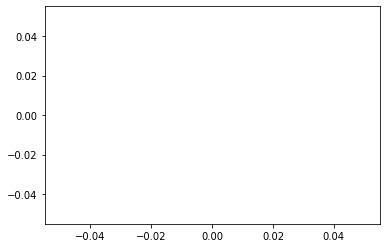

In [597]:
plt.plot(data[data['country_id'] == '1729']['buildUpPlaySpeed'],data[data['country_id'] == '1729']['goals_per_team'])
plt.show() #q3

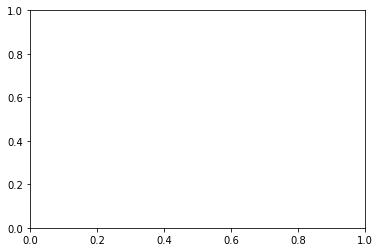

In [598]:
sns.lineplot(data = data, x=data[data['country_id'] == '1729']['buildUpPlaySpeed'], y = data[data['country_id'] == '1729']['goals_per_team'])

In [569]:
df3 = df1.drop(['id', 'date', 'match_api_id', 'team_api_id', 'home_team_api_id', 'away_team_api_id'], axis = 1)

In [570]:
df3

,country_id,league name,country,season,home_team_goal,away_team_goal,team_short_name
0,1,Belgium Jupiler League,Belgium,2008/2009,1,1,BAC
1,1,Belgium Jupiler League,Belgium,2008/2009,0,0,LOK
2,1,Belgium Jupiler League,Belgium,2008/2009,0,3,AND
3,1,Belgium Jupiler League,Belgium,2008/2009,5,0,MON
4,1,Belgium Jupiler League,Belgium,2008/2009,1,3,STL
...,...,...,...,...,...,...,...
25974,24558,Switzerland Super League,Switzerland,2015/2016,1,0,THU
25975,24558,Switzerland Super League,Switzerland,2015/2016,1,2,LUZ
25976,24558,Switzerland Super League,Switzerland,2015/2016,2,0,SIO
25977,24558,Switzerland Super League,Switzerland,2015/2016,0,0,ZUR


In [571]:
df3.country.unique()

array(['Belgium', 'England', 'France', 'Germany', 'Italy', 'Netherlands',
       'Poland', 'Portugal', 'Scotland', 'Spain', 'Switzerland'],
      dtype=object)

In [575]:
df3 = df3[df3.country.isin(['England', 'France', 'Germany', 'Italy','Spain'])]

In [576]:
df3.head()

,country_id,league name,country,season,home_team_goal,away_team_goal,team_short_name
1728,1729,England Premier League,England,2008/2009,1,1,NEW
1729,1729,England Premier League,England,2008/2009,1,0,WBA
1730,1729,England Premier League,England,2008/2009,0,1,LIV
1731,1729,England Premier League,England,2008/2009,2,1,WIG
1732,1729,England Premier League,England,2008/2009,4,2,MCI


In [577]:
df3['goals'] = df3['home_team_goal']+df3['away_team_goal']

In [579]:
df3 = df3.groupby(['season', 'country'])['goals'].sum().reset_index()

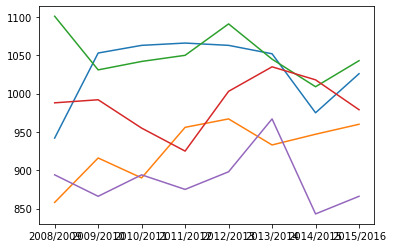

<Figure size 1440x720 with 0 Axes>

In [580]:
plt.plot(df3[df3['country'] == 'England']['season'], df3[df3['country'] == 'England']['goals'])
plt.plot(df3[df3['country'] == 'France']['season'], df3[df3['country'] == 'France']['goals'])
plt.plot(df3[df3['country'] == 'Spain']['season'], df3[df3['country'] == 'Spain']['goals'])
plt.plot(df3[df3['country'] == 'Italy']['season'], df3[df3['country'] == 'Italy']['goals'])
plt.plot(df3[df3['country'] == 'Germany']['season'], df3[df3['country'] == 'Germany']['goals'])
plt.figure(figsize =(20,10))
plt.show() #q2

In [581]:
df4 = pd.merge(right = team, left = df, how = 'left', left_on = 'away_team_api_id', right_on = 'team_api_id')

In [582]:
df4

,country_id,league name,country,id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_short_name
0,1,Belgium Jupiler League,Belgium,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,9993,BAC
1,1,Belgium Jupiler League,Belgium,2,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,9994,LOK
2,1,Belgium Jupiler League,Belgium,3,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,8635,AND
3,1,Belgium Jupiler League,Belgium,4,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,9998,MON
4,1,Belgium Jupiler League,Belgium,5,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,9985,STL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland Super League,Switzerland,25975,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,10191,THU
25975,24558,Switzerland Super League,Switzerland,25976,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,10199,LUZ
25976,24558,Switzerland Super League,Switzerland,25977,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,10179,SIO
25977,24558,Switzerland Super League,Switzerland,25978,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,10243,ZUR


In [596]:
ply_att

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [586]:
ply_att.columns

Index(['Unnamed: 0', 'id', 'player_fifa_api_id', 'player_api_id', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [587]:
ply_att.drop(['Unnamed: 0'], axis = 1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [588]:
ply_att[['aggression','penalties']]

,aggression,penalties
0,71.0,48.0
1,71.0,48.0
2,63.0,48.0
3,62.0,47.0
4,62.0,47.0
...,...,...
183973,56.0,83.0
183974,61.0,70.0
183975,67.0,70.0
183976,63.0,53.0


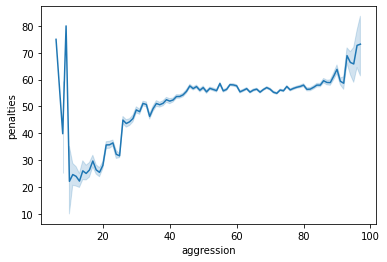

In [589]:
#question 1: does agression leads to an increase in penalties
sns.lineplot(data= ply_att, x= 'aggression', y = 'penalties')

In [595]:
#question 2: does better vision leads to more goals

In [594]:
ply_att[['vision', 'finishing']]

,vision,finishing
0,54.0,44.0
1,54.0,44.0
2,54.0,44.0
3,53.0,43.0
4,53.0,43.0
...,...,...
183973,88.0,77.0
183974,88.0,76.0
183975,88.0,71.0
183976,88.0,64.0


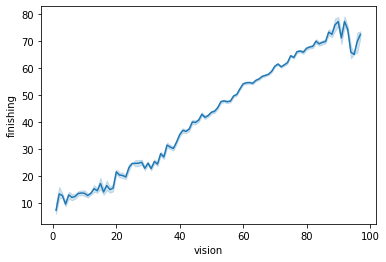

In [592]:
sns.lineplot(data = ply_att, x='vision', y='finishing')

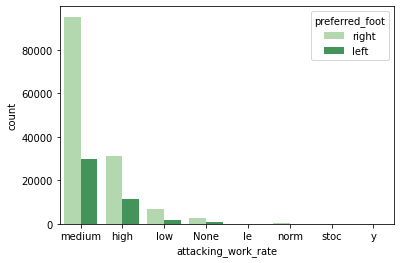

In [593]:
sns.countplot(data = ply_att, x= "attacking_work_rate", hue = "preferred_foot", palette = "Greens")

Q. how is goalkeeper's position related to attacking work rate

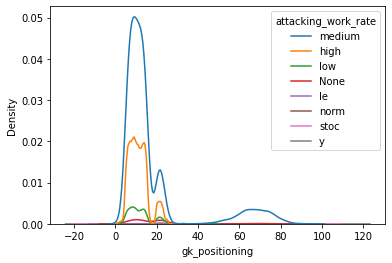

In [591]:
sns.kdeplot( data = ply_att, x= "gk_positioning", hue = "attacking_work_rate") 

q. does crossing affect finishing psoitively?

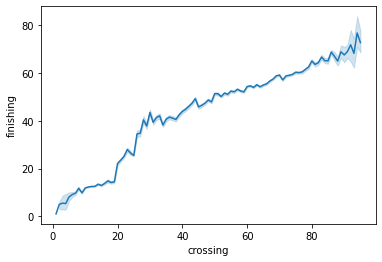

In [590]:
sns.lineplot(data = ply_att, x = 'crossing', y= 'finishing' )